In [1]:
import otmol as otm
import pandas as pd
import matplotlib.pyplot as plt
import os
from experiment_utils import ng_experiment
# %matplotlib widget

In [2]:
data_path = "../Data/Neon-Clusters/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='S1')

In [3]:
otmol_res = ng_experiment(molecule_pairs, data_path, p_list=range(2,9), method = 'emd')

10-1 10-2 emd 0.32 0.07s
50-1 50-2 emd 0.31 0.04s
100-1 100-2 emd 0.21 0.11s
150-1 150-2 emd 0.19 0.23s
200-1 200-2 emd 0.26 0.61s
300-1 300-2 emd 0.12 1.11s
500-1 500-2 emd 0.11 2.95s
1000-1 1000-2 emd 0.10 12.61s


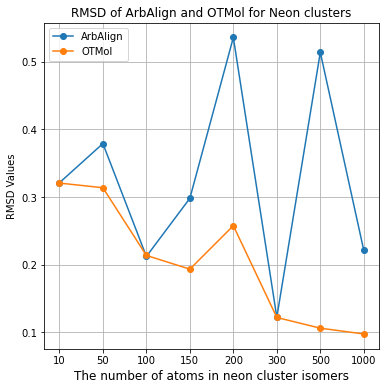

In [4]:
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+').rename(columns={'RMSD(KM-ByAtomName)': 'ArbAlign'})
combined_df = pd.concat([arbalign_res, otmol_res.rename(columns={'RMSD(OTMol)': 'OTMol'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]
plt.figure(figsize=(6,6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df)), combined_df[column], marker='o', label=column)
plt.title("RMSD of ArbAlign and OTMol for Neon clusters")
plt.xlabel("The number of atoms in neon cluster isomers", fontsize=12)
plt.ylabel("RMSD Values")
#plt.ylim(0.5, 3)
plt.xticks(range(len(combined_df)), combined_df['# atoms'])
plt.legend()
plt.grid(True)

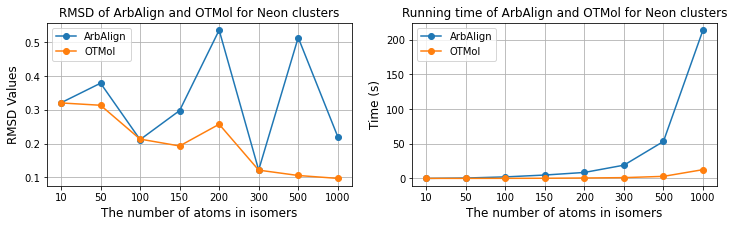

In [5]:
plt.figure(figsize=(12,3))
plt.subplot(121)
otmol_res = pd.read_csv("./otmolOutput/ng_results_emd.csv")
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+').rename(columns={'RMSD(KM-ByAtomName)': 'ArbAlign'})
combined_df = pd.concat([arbalign_res, otmol_res.rename(columns={'RMSD(OTMol)': 'OTMol'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]
for column in columns_to_plot:
    plt.plot(range(len(combined_df)), combined_df[column], marker='o', label=column)
plt.title("RMSD of ArbAlign and OTMol for Neon clusters")
plt.xlabel("The number of atoms in isomers", fontsize=12)
plt.ylabel("RMSD Values", fontsize=12)
#plt.ylim(0.5, 3)
plt.xticks(range(len(combined_df)), combined_df['# atoms'])
plt.legend()
plt.grid(True)

plt.subplot(122)
arbalign_res = pd.read_csv("./ArbAlignOutput/NeonCluster_result.csv").rename(columns={'time': 'ArbAlign'})
combined_df = pd.concat([arbalign_res, otmol_res.rename(columns={'time': 'OTMol'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]
for column in columns_to_plot:
    plt.plot(range(len(combined_df)), combined_df[column], marker='o', label=column)
plt.title("Running time of ArbAlign and OTMol for Neon clusters")
plt.xlabel("The number of atoms in isomers", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)
plt.xticks(range(len(combined_df)), combined_df['# atoms'])
plt.legend()
plt.grid(True)
plt.savefig("../images/NeonCluster_result.png", dpi=300, bbox_inches='tight')
plt.show()